Arman Miri  
Student ID: 07700006039  
CSCI 184 Machine Learning  

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [5]:
train1_path = 'monks-1.train'

test1_path = 'monks-1.test'

train2_path = 'monks-2.train'

test2_path = 'monks-2.test'

train3_path = 'monks-3.train'

test3_path = 'monks-3.test'

train1 = pd.read_csv(train1_path, header=None, sep=',')

test1 = pd.read_csv(test1_path, header=None, sep=',')

train2 = pd.read_csv(train2_path, header=None, sep=',')

test2 = pd.read_csv(test2_path, header=None, sep=',')

train3 = pd.read_csv(train3_path, header=None, sep=',')

test3 = pd.read_csv(test3_path, header=None, sep=',')

In [6]:
def prepare_data(data):
    
    X = data.iloc[:, 1:]  
    
    y = data.iloc[:, 0]   
    
    return X, y

X1_train, y1_train = prepare_data(train1)

X1_test, y1_test = prepare_data(test1)

X2_train, y2_train = prepare_data(train2)

X2_test, y2_test = prepare_data(test2)

X3_train, y3_train = prepare_data(train3)

X3_test, y3_test = prepare_data(test3)

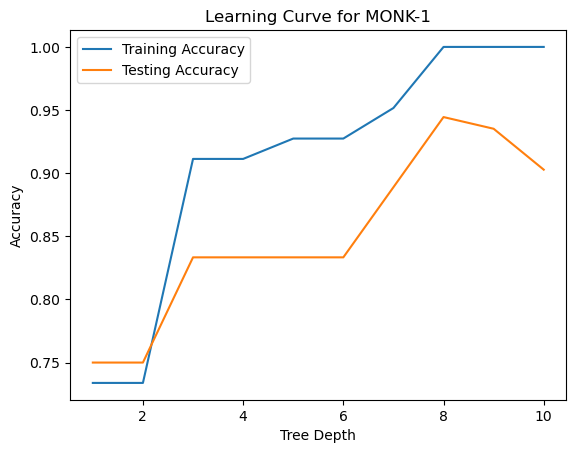

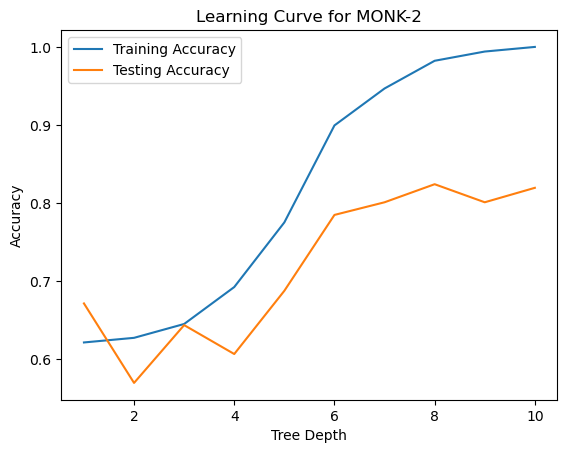

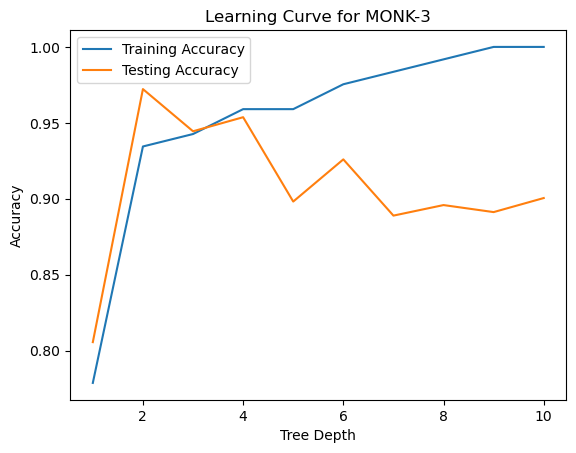

In [10]:
# part a
def plot_learning_curve(X_train, y_train, X_test, y_test, problem_number):
    train_accuracies = []
    
    test_accuracies = []
    
    depths = range(1, 11)
    
    for depth in depths:
        
        clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
        
        clf.fit(X_train, y_train)
        
        y_train_pred = clf.predict(X_train)
        
        train_accuracy = accuracy_score(y_train, y_train_pred)
        
        train_accuracies.append(train_accuracy)
        
        y_test_pred = clf.predict(X_test)
        
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        test_accuracies.append(test_accuracy)
    
    plt.plot(depths, train_accuracies, label='Training Accuracy')
    
    plt.plot(depths, test_accuracies, label='Testing Accuracy')
    
    plt.xlabel('Tree Depth')
    
    plt.ylabel('Accuracy')
    
    plt.title(f'Learning Curve for MONK-{problem_number}')
    
    plt.legend()
    
    plt.show()

plot_learning_curve(X1_train, y1_train, X1_test, y1_test, 1)

plot_learning_curve(X2_train, y2_train, X2_test, y2_test, 2)

plot_learning_curve(X3_train, y3_train, X3_test, y3_test, 3)

Confusion Matrix (Entropy) MONK-1:
          Predicted 0  Predicted 1
Actual 0          168           48
Actual 1           24          192


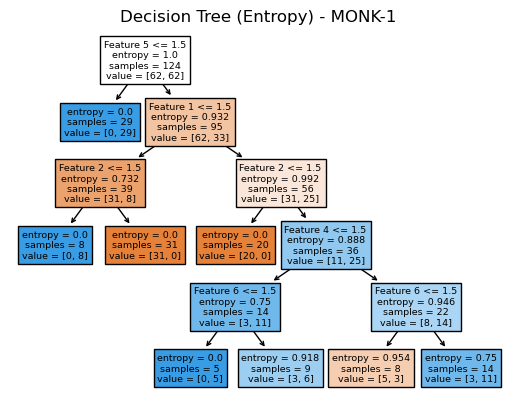

In [32]:
# Part b
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5)

clf_entropy.fit(X1_train, y1_train)

y1_test_pred_entropy = clf_entropy.predict(X1_test)

cm_entropy = confusion_matrix(y1_test, y1_test_pred_entropy)

cm_entropy_df = pd.DataFrame(cm_entropy, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

print("Confusion Matrix (Entropy) MONK-1:")

print(cm_entropy_df)

plot_tree(clf_entropy, filled=True, feature_names=[f'Feature {i}' for i in range(1, 7)])

plt.title("Decision Tree (Entropy) - MONK-1")

plt.show()

Confusion Matrix (Gini) MONK-1:
          Predicted 0  Predicted 1
Actual 0          168           48
Actual 1           24          192


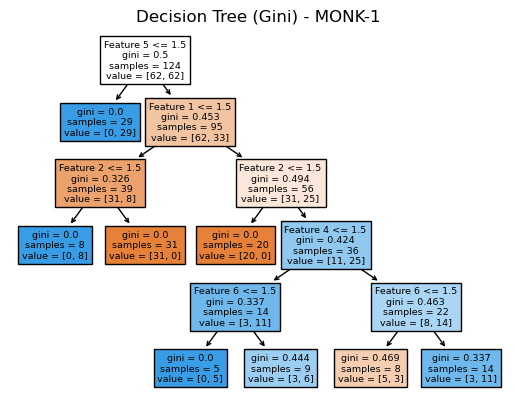

In [42]:
# Part c
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)

clf_gini.fit(X1_train, y1_train)

y1_test_pred_gini = clf_gini.predict(X1_test)

cm_gini = confusion_matrix(y1_test, y1_test_pred_gini)

cm_gini_df = pd.DataFrame(cm_gini, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

print("Confusion Matrix (Gini) MONK-1:")

print(cm_gini_df)

plot_tree(clf_gini, filled=True, feature_names=[f'Feature {i}' for i in range(1, 7)])

plt.title("Decision Tree (Gini) - MONK-1")

plt.show()

In [40]:
# Part c accuracy comparison
entropy_accuracy = accuracy_score(y1_test, y1_test_pred_entropy)

gini_accuracy = accuracy_score(y1_test, y1_test_pred_gini)

print(f"Entropy Accuracy: {entropy_accuracy:.4f}")

print(f"Gini Accuracy: {gini_accuracy:.4f}")

print(f"Entropy Confusion Matrix:\n{cm_entropy}")

print(f"Gini Confusion Matrix:\n{cm_gini}")

Entropy Accuracy: 0.8333
Gini Accuracy: 0.8333
Entropy Confusion Matrix:
[[168  48]
 [ 24 192]]
Gini Confusion Matrix:
[[168  48]
 [ 24 192]]


## Analysis

For the MONK-1 dataset, both the Entropy and Gini decision trees give the same results, with 83.33% accuracy and the exact same confusion matrices. This means that the choice between Gini and Entropy doesn’t change the outcome for this task. Both methods make the same predictions on the test set.

Even though the results are the same, the trees themselves are a bit different. The Gini criterion makes bigger splits at the start (since it focuses on impurity), while Entropy (focusing on information gain) looks for more detailed splits, which can take longer to calculate.

In this case, where the data is balanced and not too complicated, it doesn’t matter whether we use Gini or Entropy. However, if the dataset had uneven classes or was more complex, Gini might do better with simpler splits, while Entropy could work better for more detailed patterns in complex data.